In [114]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# loading the dataset 

df_1 = pd.read_csv("/content/202103-divvy-tripdata.csv")
df_2 = pd.read_csv("/content/202104-divvy-tripdata.csv")
df_3 = pd.read_csv("/content/202105-divvy-tripdata.csv")
df_4 = pd.read_csv("/content/202106-divvy-tripdata.csv")
df_5 = pd.read_csv("/content/202107-divvy-tripdata.csv")
df_6 = pd.read_csv("/content/202108-divvy-tripdata.csv")
df_7 = pd.read_csv("/content/202109-divvy-tripdata.csv")
df_8 = pd.read_csv("/content/202110-divvy-tripdata.csv")
df_9 = pd.read_csv("/content/202111-divvy-tripdata.csv")
df_10 = pd.read_csv("/content/202112-divvy-tripdata.csv")
df_11 = pd.read_csv("/content/202201-divvy-tripdata.csv")
df_12 = pd.read_csv("/content/202202-divvy-tripdata.csv")

In [116]:
# merging all the data sets in to one df
all_df = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
new_df = pd.concat(all_df)
df = new_df


In [117]:
# reading the merged file
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual


In [118]:
# get information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667986 entries, 0 to 115608
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [119]:
# to convert object data type of start time and end time columns into date time datatype
df['start_time'] = pd.to_datetime(df['started_at'])
df['end_time'] = pd.to_datetime(df['ended_at'])



In [120]:
# adding new column ride length(ended at - started at)  to calculate the time travelled
df['ride_length'] = df['end_time'] - df['start_time']
df['ride_length']

0        0 days 00:04:04
1        0 days 00:10:27
2        0 days 00:16:24
3        0 days 00:28:59
4        0 days 00:17:56
               ...      
115604   0 days 00:14:40
115605   0 days 00:07:05
115606   0 days 00:11:38
115607   0 days 00:02:37
115608   0 days 00:07:33
Name: ride_length, Length: 5667986, dtype: timedelta64[ns]

In [121]:
# to get the updated information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667986 entries, 0 to 115608
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          object         
 3   ended_at            object         
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  start_time          datetime64[ns] 
 14  end_time            datetime64[ns] 
 15  ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(9), timedelta64[ns](1)
memory usage: 735.1+ MB


In [122]:
# spliting and extracting the data from 'started_at' column
df['start_date_1'] = [i.split("  ") [0] for i in df['started_at']]

In [123]:
# converting start date_1 into datatime data types
df['start_date_1'] = pd.to_datetime(df['start_date_1'])

In [124]:
# finding the weekday
df['weekday'] = df['start_date_1'].apply(lambda x: x.weekday())
df['weekday'].unique()

array([1, 6, 3, 5, 2, 0, 4])

In [125]:
# converting weekday data in to weekday 
dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df['weekday'] = df['weekday'].apply(lambda y: dict[y])
df['weekday']

0            Monday
1          Saturday
2         Wednesday
3         Wednesday
4          Saturday
            ...    
115604      Tuesday
115605     Thursday
115606       Sunday
115607    Wednesday
115608       Sunday
Name: weekday, Length: 5667986, dtype: object

In [126]:
# sorting the dataframe by start date in ascending order
df.sort_values(by=['started_at'], inplace=True, ascending=True)

In [127]:
# checking the null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      761817
end_station_id        761817
start_lat                  0
start_lng                  0
end_lat                 4617
end_lng                 4617
member_casual              0
start_time                 0
end_time                   0
ride_length                0
start_date_1               0
weekday                    0
dtype: int64

In [128]:
# droping the null values from all the rows
df = df.dropna()


In [129]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
start_time            0
end_time              0
ride_length           0
start_date_1          0
weekday               0
dtype: int64

In [130]:
# calculating the euclidean distance from start and end point
df['x'] = (df['end_lat'] - df['start_lat'])**2
df['y'] = (df['end_lng'] - df['start_lng'])**2
df['distance'] = (df['x']+df['y'])**1/2
df['distance']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

228108    3.258017e-04
82906     7.161250e-10
44229     7.098223e-04
179920    8.748399e-05
66333     4.441754e-03
              ...     
92964     1.022374e-04
58427     4.102760e-05
3425      4.890912e-05
36602     2.142146e-04
43154     1.850191e-03
Name: distance, Length: 4631103, dtype: float64

In [131]:
# to extract year and month from start date column
df['year'] = pd.DatetimeIndex(df['start_date_1']).year
df['month'] =pd.DatetimeIndex(df['start_date_1']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
# to convert object data type to timedelta
df['ride_len'] = pd.to_timedelta(df['ride_length'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [133]:
# checking duplicates value in data frame
df.duplicated().any()

False

In [134]:
# calculating mean of ride_length of all type of user
df['ride_len'].mean()

Timedelta('0 days 00:21:37.485625994')

In [135]:
# calculating max ride length of all types of users
df['ride_len'].max()

Timedelta('38 days 20:24:09')

In [136]:
# calculating mean ride length for member
mean_ride_length_member = df[df['member_casual'] == 'member']
mean_ride_length_member = mean_ride_length_member['ride_len'].mean()
mean_ride_length_member 

Timedelta('0 days 00:13:02.600083466')

In [137]:
# calculating mean ride length for casual riders
mean_ride_length_casual = df[df['member_casual'] == 'casual']
mean_ride_length_casual = mean_ride_length_casual['ride_len'].mean()
mean_ride_length_casual


Timedelta('0 days 00:32:24.164259983')

In [138]:
# calculating max ride length for member
max_ride_length_member = df[df['member_casual'] == 'member']
max_ride_length_member = max_ride_length_member['ride_len'].max()
max_ride_length_member

Timedelta('1 days 00:55:38')

In [139]:
# calculating max ride length for casual rider 
max_ride_length_casual = df[df['member_casual'] == 'casual']
max_ride_length_casual = max_ride_length_casual['ride_len'].max()
max_ride_length_casual

Timedelta('38 days 20:24:09')

In [140]:
# calculating mode of weekday
df['weekday'].mode()

0    Friday
dtype: object

In [141]:
# calculating mode of weekday for member
mode_weekday_member =  df[df['member_casual'] == 'member']
mode_weekday_member = mode_weekday_member['weekday'].mode()
mode_weekday_member

0    Tuesday
dtype: object

In [142]:
# calculating mode of weekday for casual member
mode_weekday_member =  df[df['member_casual'] == 'casual']
mode_weekday_member = mode_weekday_member['weekday'].mode()
mode_weekday_member

0    Friday
dtype: object

In [143]:
# calculate the number of rides for users by weekday by adding count of ride_id to values
dict = {'Sunday': 0, 'Monday': 1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
df['weekday'] = df['weekday'].apply(lambda y: dict[y])
count_user_weekday = df.groupby('weekday')['ride_id'].count()
count_user_weekday = count_user_weekday.sort_index()
count_user_weekday


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


weekday
0    590034
1    613854
2    622959
3    602766
4    657547
5    823117
6    720826
Name: ride_id, dtype: int64

In [144]:
# calculating number of rides for member by week_day by adding count of ride_id to values
count_member_weekday = df[df['member_casual'] == 'member'].groupby('weekday')['ride_id'].count()
count_member_weekday

weekday
0    358450
1    397754
2    404032
3    378281
4    367415
5    356617
6    315729
Name: ride_id, dtype: int64

In [145]:
# calculating number of rides for casual by week_day by adding count of ride_id to values
count_casual_weekday = df[df['member_casual'] == 'casual'].groupby('weekday')['ride_id'].count()
count_casual_weekday

weekday
0    231584
1    216100
2    218927
3    224485
4    290132
5    466500
6    405097
Name: ride_id, dtype: int64

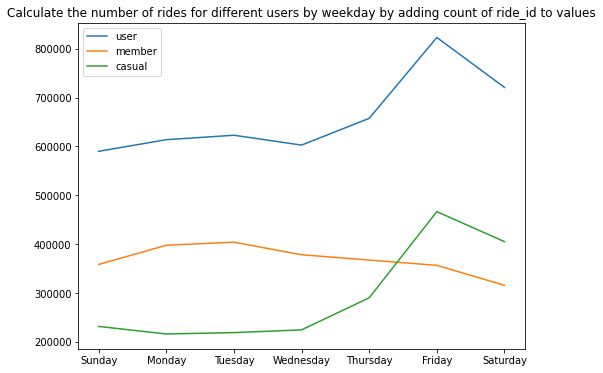

In [146]:
# ploting graph of weekday vs number of rides
plt.figure(figsize=(8,6))
plt.plot(count_user_weekday.index, count_user_weekday.values)
plt.plot(count_member_weekday.index, count_member_weekday.values)
plt.plot(count_casual_weekday.index, count_casual_weekday.values)
plt.title("Calculate the number of rides for different users by weekday by adding count of ride_id to values")
plt.legend(["user", "member",  "casual"])
labels = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.xticks(count_casual_weekday.index,labels)
plt.show()

In [147]:
# calculating the average ride length for users by weekday
user_avg_ride_len_weekday = df.groupby('weekday')['ride_len'].mean(numeric_only=False)
user_avg_ride_len_weekday 

weekday
0   0 days 00:20:25.451962090
1   0 days 00:18:01.278478270
2   0 days 00:17:54.771063585
3   0 days 00:18:09.672819966
4   0 days 00:20:39.224335294
5   0 days 00:25:58.802855487
6   0 days 00:27:41.569817126
Name: ride_len, dtype: timedelta64[ns]

In [148]:
# calculating the average ride_length for member by weekday
member_avg_ride_len_weekday = df[df['member_casual'] == 'member'].groupby('weekday')['ride_len'].mean(numeric_only=False)
member_avg_ride_len_weekday

weekday
0   0 days 00:12:35.091714325
1   0 days 00:12:14.303084318
2   0 days 00:12:18.760924877
3   0 days 00:12:14.247324079
4   0 days 00:12:42.324137555
5   0 days 00:14:39.685146810
6   0 days 00:15:02.644663619
Name: ride_len, dtype: timedelta64[ns]

In [149]:
# calculating the average ride_length for casual by weekday
casual_avg_ride_len_weekday = df[df['member_casual'] == 'casual'].groupby('weekday')['ride_len'].mean(numeric_only=False)
casual_avg_ride_len_weekday

weekday
0   0 days 00:32:33.484256252
1   0 days 00:28:39.921934289
2   0 days 00:28:14.881184139
3   0 days 00:28:08.602423324
4   0 days 00:30:43.157324941
5   0 days 00:34:37.955952840
6   0 days 00:37:33.069334011
Name: ride_len, dtype: timedelta64[ns]

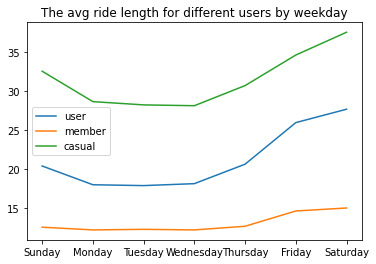

In [150]:
# plotting graph of weekday vs average ride length
plt.plot(user_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_weekday/pd.Timedelta(minutes=1))
plt.title("The avg ride length for different users by weekday")
plt.legend(['user','member','casual'])
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.xticks(user_avg_ride_len_weekday.index, labels)
plt.show()



In [151]:
# extracting important features of the dataframe in to new dataframe
new_df = df[['ride_id','rideable_type','ride_len','weekday','distance','year','month','member_casual']]

In [152]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631103 entries, 228108 to 43154
Data columns (total 8 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   ride_len       timedelta64[ns]
 3   weekday        int64          
 4   distance       float64        
 5   year           int64          
 6   month          int64          
 7   member_casual  object         
dtypes: float64(1), int64(3), object(3), timedelta64[ns](1)
memory usage: 318.0+ MB


In [153]:
# to check the number of users each type over past 12 months
member_type = new_df['member_casual'].value_counts()
member_type

member    2578278
casual    2052825
Name: member_casual, dtype: int64

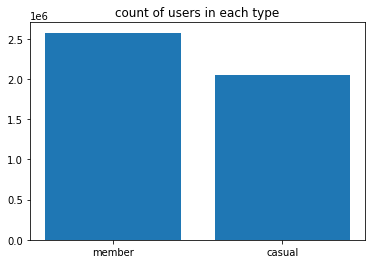

In [154]:
# plotting the count plot of users in each type
plt.title("count of users in each type")
plt.bar(member_type.index, member_type.values)
plt.show()

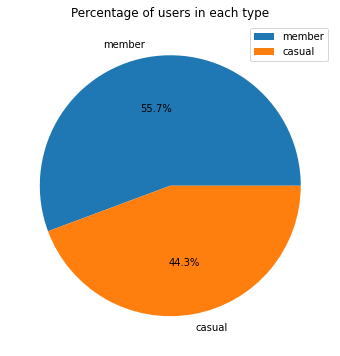

In [155]:
# plotting the pie chart of users in each type
plt.figure(figsize=(8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [156]:
# checking the number of users over years
user_over_year = new_df.groupby('year')['member_casual'].value_counts()
user_over_year

year  member_casual
2021  member           2436721
      casual           2025076
2022  member            141557
      casual             27749
Name: member_casual, dtype: int64

In [157]:
# to segregate the number of users into member or casual riders over the years
list_year = []
list_x = []
list_y = list(user_over_year.values)
for i, j in user_over_year.index:
  list_x.append(j)
  list_year.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of member and casual riders over the years')

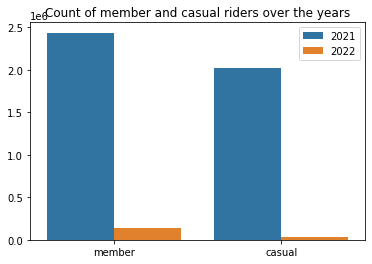

In [158]:
# plotting count of member and casual riders over the years
sns.barplot(list_x, list_y, hue = list_year)
plt.title("Count of member and casual riders over the years")


In [159]:
# checking the number of users over months
user_over_month = new_df.groupby('month')['member_casual'].value_counts()
user_over_month

month  member_casual
1      member            67523
       casual            12605
2      member            74034
       casual            15144
3      member           130049
       casual            75642
4      member           177787
       casual           120420
5      member           234165
       casual           216829
6      member           304586
       casual           304192
7      casual           369415
       member           322906
8      casual           341476
       member           332933
9      member           328219
       casual           292931
10     member           288855
       casual           189117
11     member           185926
       casual            69978
12     member           131295
       casual            45076
Name: member_casual, dtype: int64

In [160]:
# to segregate the number of users into member or casual riders over the months
list_month = []
list_x = []
list_y = list(user_over_month.values)
for i, j in user_over_month.index:
  list_x.append(j)
  list_month.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of member and casual riders over the months')

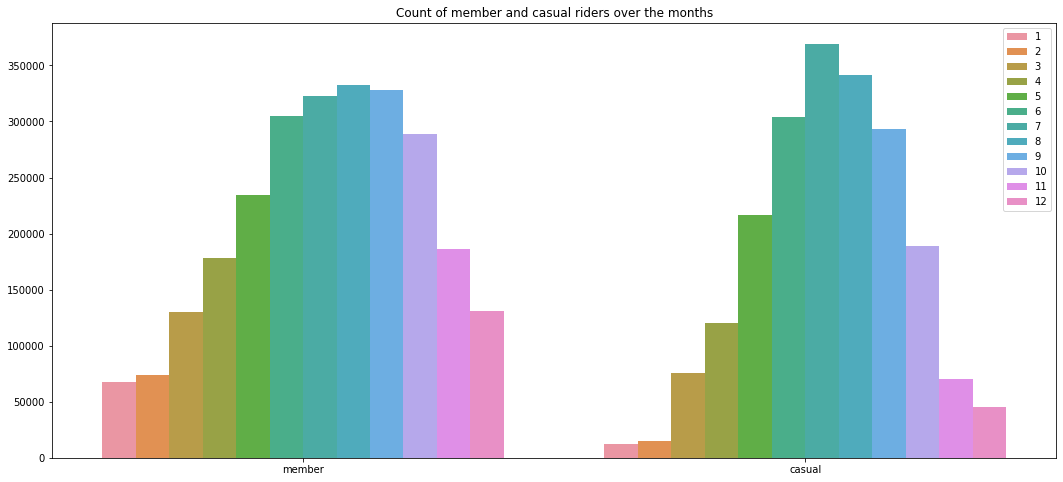

In [161]:
# plotting the member and casual riders over the months 
plt.figure(figsize=(18,8))
sns.barplot(list_x, list_y, hue = list_month)
plt.title("Count of member and casual riders over the months")


In [162]:
# checking the number of users for a particular rideable_type
ride_type = new_df.groupby('member_casual')['rideable_type'].value_counts()
ride_type

member_casual  rideable_type
casual         classic_bike     1262694
               electric_bike     479172
               docked_bike       310959
member         classic_bike     1997166
               electric_bike     581112
Name: rideable_type, dtype: int64

In [163]:
# to segregate the number of users into member or casual riders based on the ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
  list_x.append(j)
  list_member.append(str(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of member and casual riders over the months')

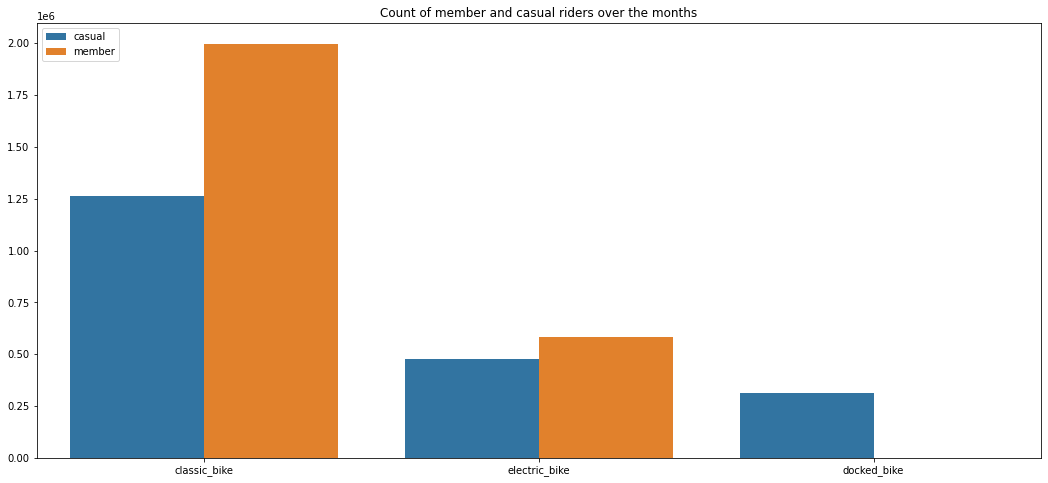

In [164]:
# plotting the number of users into member or casual riders based on ride type
plt.figure(figsize=(18,8))
sns.barplot(list_x, list_y, hue= list_member)
plt.title("Count of member and casual riders over the months")